<a href="https://colab.research.google.com/github/mcmejiag14/Deep-Learning/blob/main/Question3Homework1DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXCERISCE 3 **

In [1]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [2]:
!ls "/content/drive/My Drive/Colab Notebooks"

'Copia de Solving Schrodinger equation using numerical methods.ipynb'
 Untitled0.ipynb
 Untitled12.ipynb


In [3]:
#Python version
import sys
print(sys.version)

#or 
!python --version

3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
Python 3.9.16


First we import torch 

In [4]:
import torch; 
#Sets the seed for generating random numbers.
torch.manual_seed(0)

#torch. nn import gives us access to some helpful neural network things, such as various neural network layer types (things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc).
import torch.nn as nn 

#applies Convolution functions
import torch.nn.functional as F

#allow to access pre-loaded datasets as well as your own data
import torch.utils

#contains parameterizable probability distributions and sampling functions
import torch.distributions

#consists of popular datasets, model architectures, and common image transformations for computer vision
import torchvision

import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200

Here we check that we are working on GPU 

In [5]:
#Check GPU Availability
torch.cuda.is_available()

True

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


Now we define the Encoder, Decoder and Autoencoder

In [7]:
class Encoder(nn.Module):
    def __init__(self, latent_dims): ## the second part is the dimension of the z that we want to use"""
        super(Encoder, self).__init__() ###  We need to use the super to access the contruction of the encoder class, this will give you inheritance
        ## Fisrt Linear Neural Network with two layers.
        self.linear1 = nn.Linear(784, 512)  ## One hiden layer, one input layer), and One output layer. In the inout layer we have 28x28 pixel images
        ## In the input layer we have 784 inputs connected to 512 neurons within hidden layer.
        self.linear2 = nn.Linear(512, latent_dims) ## Fisrt Linear Neural Network with two layers. 512 input nodes, ouput layer the dimension
    
    def forward(self, x): ## The forward proacgation for encoding class
        x = torch.flatten(x, start_dim=1) ## Fisrts thing is flatten the input in the dimension given
        x = F.relu(self.linear1(x)) ## We apply the RELU function into the linear1
        return self.linear2(x) ## Finally aplyied to the linear2

In [8]:
class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        self.linear1 = nn.Linear(latent_dims, 512)
        self.linear2 = nn.Linear(512, 784)  ## Here we back to the original  the latent dimension  and the output layers.
        
    def forward(self, z): ## We define the forward propagation, the backprogpagation could be automatically, but you have to have forward propagation
        z = F.relu(self.linear1(z))  
        z = torch.sigmoid(self.linear2(z)) 
        return z.reshape((-1, 1, 28, 28)) ## Once you have the output you could reshape in the original image respahe( Number of samples ,Number of chanels, high, with)
     

In [9]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(Autoencoder, self).__init__() ## We are going to access to parent constructor
        self.encoder = Encoder(latent_dims)
        self.decoder = Decoder(latent_dims)
    
    def forward(self, x):
        z = self.encoder(x) ##
        return self.decoder(z) ## Once you have the forqard propagation you will have the output as z and then you will do the decoder for the z values. }
        ## We need to back the z values.

Now we are going to train, here we also define the loss because as we want to graph the train loss and the test loss we need to print the values of the train loss and test loss.

In [25]:
def train(autoencoder, traindata, testdata, epochs=20):
    opt = torch.optim.Adam(autoencoder.parameters())
    TrainLoss=np.zeros(epochs)
    TestLoss=np.zeros(epochs)
    for epoch in range(epochs):
        for x, y in traindata:
            x = x.to(device) # GPU
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).mean()
            TrainLoss[epoch]=loss
            loss.backward()
            opt.step()
        print(f'Epoch {epoch+1} Training Loss: {loss:.4f}')    
        for x, y in testdata:
            x = x.to(device) # GPU
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).mean()
            TestLoss[epoch]=loss
        print(f'Epoch {epoch+1} Test Loss: {loss:.4f}')   
    return autoencoder, TrainLoss, TestLoss

In [12]:
#Define latent_dims
latent_dims = 2
autoencoder = Autoencoder(latent_dims).to(device)#GPU

In [13]:
data = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('./data', 
               transform=torchvision.transforms.ToTensor(), 
               download=True),
        batch_size=128,
        shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 105887340.46it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 41541733.14it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26380925.01it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17837573.75it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [14]:
print(data)

In [15]:
for batch_size, samples in enumerate(data): ## We are going to have the batch size samples in whatever tha data thta we had
      print(batch_size, samples)

Se han truncado las últimas 5000 líneas del flujo de salida.

        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([2, 2, 7, 4, 7, 9, 8, 0, 3, 6, 5, 3, 9, 6, 7, 0, 9, 1, 9, 8, 0, 2, 1, 3,
        1, 7, 5, 4, 0, 9, 2, 1, 2, 0, 2, 0, 6, 2, 4, 7, 1, 6, 5, 1, 1, 3, 9, 7,
        4, 9, 7, 0, 1, 4, 1, 0, 1, 9, 9, 9, 2, 3, 9, 8, 6, 3, 5, 5, 6, 9, 5, 6,
        8, 4, 0, 9, 7, 6, 8, 1, 9, 9, 4, 9, 8, 7, 7, 9, 2, 3, 0, 1, 1, 5, 7, 9,
        1, 0, 0, 8, 9, 8, 2, 8, 7, 4, 3, 8, 5, 0, 6, 1, 8, 5, 2, 9, 9, 6, 7,

In [26]:
kwargs = {'num_workers': 1, 'pin_memory': True} if device=='cuda' else {}

traindata=torchvision.datasets.MNIST('/files/', transform=torchvision.transforms.ToTensor(), train=True,  download=True)
train_loader = torch.utils.data.DataLoader(
  traindata,
  batch_size=batch_size, **kwargs)
testdata=torchvision.datasets.MNIST('files/', transform=torchvision.transforms.ToTensor(),  train=False, download=True)
test_loader = torch.utils.data.DataLoader(
  testdata,
  batch_size=batch_size, **kwargs)

In [27]:
import torchvision.transforms as transforms

In [28]:
transform = transforms.Compose([
    # resize
    transforms.Resize(28),
    # center-crop
    transforms.CenterCrop(32),
    # to-tensor
    transforms.ToTensor(),
    # normalize
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [19]:
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=False)

In [20]:
classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

def imshow(img):
     img = img / 2 + 0.5
     npimg = img.numpy()
     plt.imshow(np.transpose(npimg, (1, 2, 0)))
     plt.show()
    
dataiter = iter(data)
images, labels = next(dataiter)   

In [21]:
print(type(images))
print(images.shape)
print(torch.min(images[1]))
print(torch.max(images[1]))

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
tensor(0.)
tensor(1.)


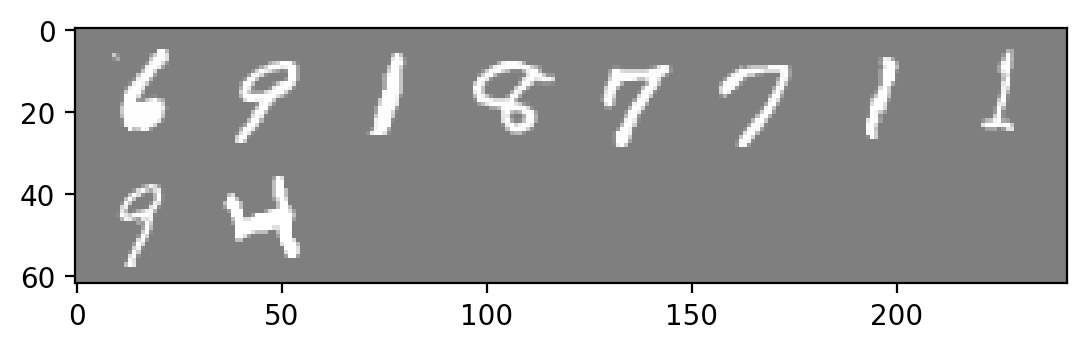

    6     9     1     8     7     7     1     1     9     4


In [22]:
imshow(torchvision.utils.make_grid(images[0:10]))

print(' '.join('%5s' % classes[labels[j]] for j in range(10)))

In [29]:
latent_dims = 2
autoencoder = Autoencoder(latent_dims).to(device) # GPU

[autoencoder, trainloss, testloss] = train(autoencoder, train_loader, test_loader)

Epoch 1 Training Loss: 0.0585
Epoch 1 Test Loss: 0.0507
Epoch 2 Training Loss: 0.0557
Epoch 2 Test Loss: 0.0473
Epoch 3 Training Loss: 0.0516
Epoch 3 Test Loss: 0.0452
Epoch 4 Training Loss: 0.0494
Epoch 4 Test Loss: 0.0440
Epoch 5 Training Loss: 0.0482
Epoch 5 Test Loss: 0.0435
Epoch 6 Training Loss: 0.0474
Epoch 6 Test Loss: 0.0431
Epoch 7 Training Loss: 0.0465
Epoch 7 Test Loss: 0.0428
Epoch 8 Training Loss: 0.0457
Epoch 8 Test Loss: 0.0426
Epoch 9 Training Loss: 0.0449
Epoch 9 Test Loss: 0.0424
Epoch 10 Training Loss: 0.0443
Epoch 10 Test Loss: 0.0422
Epoch 11 Training Loss: 0.0437
Epoch 11 Test Loss: 0.0421
Epoch 12 Training Loss: 0.0434
Epoch 12 Test Loss: 0.0418
Epoch 13 Training Loss: 0.0429
Epoch 13 Test Loss: 0.0417
Epoch 14 Training Loss: 0.0425
Epoch 14 Test Loss: 0.0415
Epoch 15 Training Loss: 0.0420
Epoch 15 Test Loss: 0.0414
Epoch 16 Training Loss: 0.0417
Epoch 16 Test Loss: 0.0413
Epoch 17 Training Loss: 0.0414
Epoch 17 Test Loss: 0.0412
Epoch 18 Training Loss: 0.0411
E

Here we are going to graph the train loss and the test lost

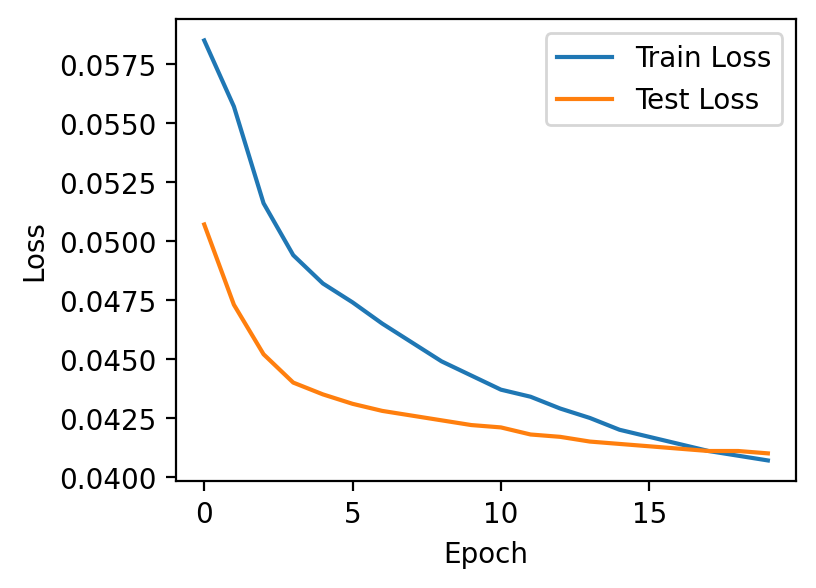

In [30]:
def plot_loss(train_loss, test_loss):
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.plot(train_loss, label='Train Loss')
    ax.plot(test_loss, label='Test Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    plt.show()


train_loss = [0.0585,0.0557,0.0516,0.0494,0.0482,0.0474,0.0465,0.0457,0.0449,0.0443,0.0437,0.0434,0.0429,0.0425,0.0420,0.0417,0.0414,0.0411,0.0409, 0.0407]
test_loss = [0.0507,0.0473,0.0452,0.0440,0.0435,0.0431,0.0428,0.0426,0.0424,0.0422,0.0421,0.0418,0.0417,0.0415,0.0414,0.0413,0.0412,0.0411,0.0411,0.0410]

plot_loss(train_loss, test_loss)

Now, we are going to randomly generate 10 images and graoh them, Then we will to decode and compare.

In [41]:
import random as rand

In [45]:
indices = rand.sample(range(len(test_loader)), 10)
images=torch.stack([testdata[i][0] for i in indices])

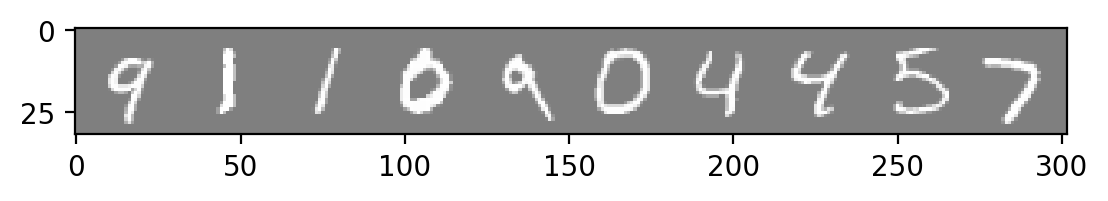

    9     1     1     0     9     0     4     4     5     7


In [46]:
imshow(torchvision.utils.make_grid(images,nrow=10))
print(' '.join('%5s' % classes[testlabels[indices[j]]] for j in range(10)))

Defining the model, we get

In [52]:
data_loader = torch.utils.data.DataLoader(images, batch_size=2, shuffle=True)

num_epochs=10

#Define model, loss function, and optimizer
Newmodel = Autoencoder(latent_dims=2)
Newloss = nn.MSELoss()
opt = torch.optim.Adam(Newmodel.parameters(), lr=0.001)

#Train
for epoch in range(num_epochs):
    for data in data_loader:
        img = data
        #Forward
        output = Newmodel(img)
        loss = Newloss(output, img)
        
        #Backward
        opt.zero_grad()
        loss.backward()
        opt.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

print('Done')
     

Epoch [1/10], Loss: 0.1555
Epoch [2/10], Loss: 0.0621
Epoch [3/10], Loss: 0.0772
Epoch [4/10], Loss: 0.0581
Epoch [5/10], Loss: 0.0662
Epoch [6/10], Loss: 0.0576
Epoch [7/10], Loss: 0.0602
Epoch [8/10], Loss: 0.0460
Epoch [9/10], Loss: 0.0845
Epoch [10/10], Loss: 0.0419
Done


In [60]:
## Decoding the Model
with torch.no_grad():
    decoded_model = Newmodel(images).detach().numpy()


Graphing the model to compare

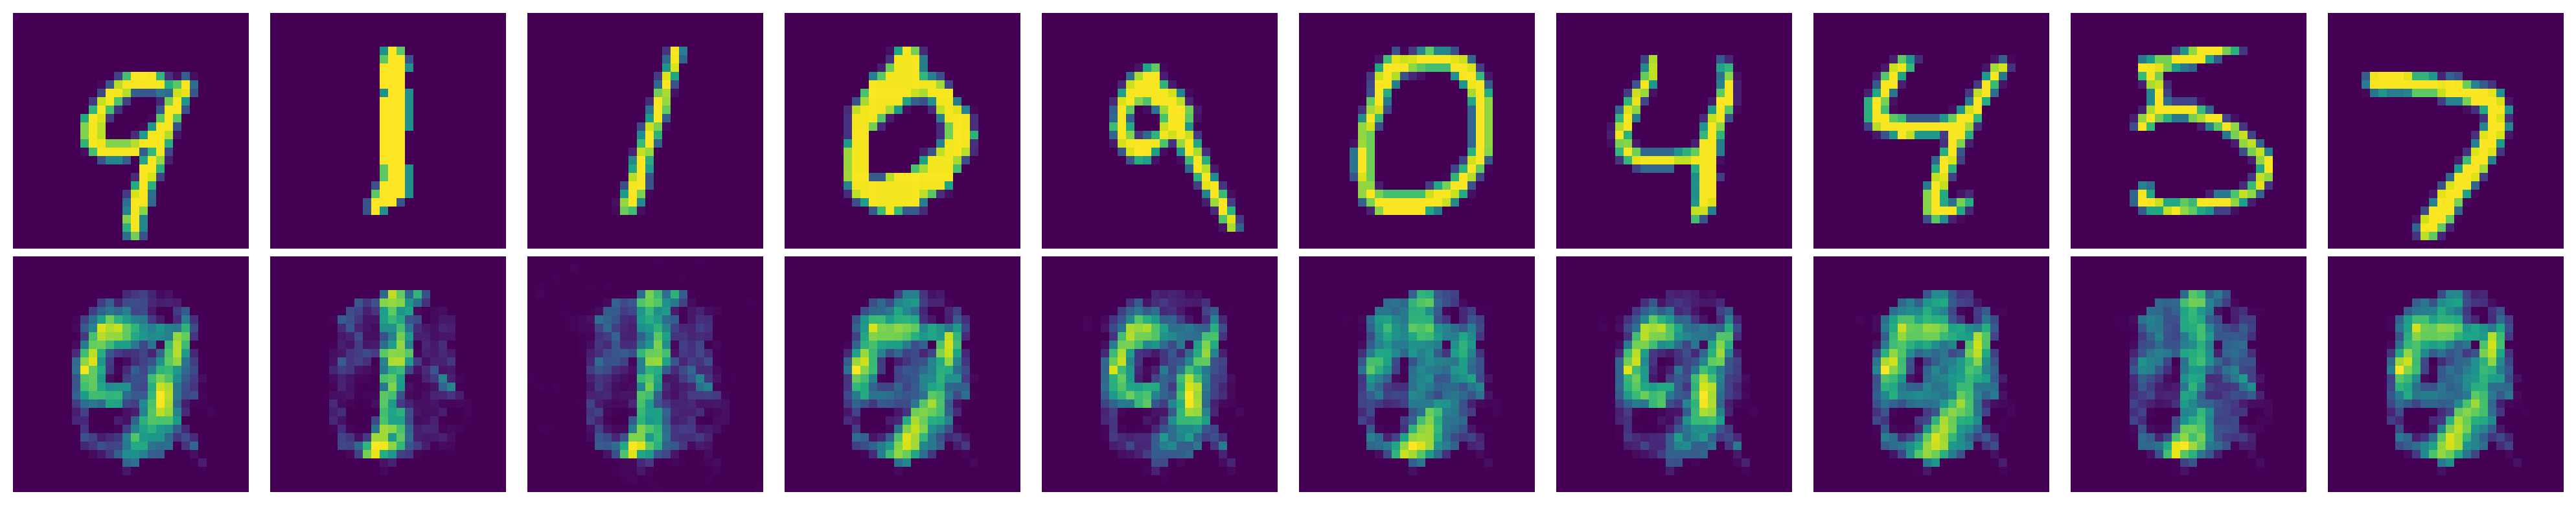

In [63]:

fig, ax = plt.subplots(2, 10, figsize=(n*2, 4))

for i in range(10):
    # display original images
    ax[0][i].imshow(images[i].permute(1, 2, 0))
    ax[0][i].axis('off')
    
    # display reconstructed images
    ax[1][i].imshow(decoded_model[i].transpose(1, 2, 0))
    ax[1][i].axis('off')

plt.tight_layout()
plt.show()
     